In [1]:
import numpy as np
import pandas as pd

# visualization Library/tools
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


from sklearn import preprocessing
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

# machine learning algorith
from sklearn.linear_model import LogisticRegression
from sklearn import svm 
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis



from scipy.stats import randint as sp_randint

In [2]:
# import scikit tools to read boston dataset
testperf = pd.read_csv('testperf.csv')
trainperf = pd.read_csv('trainperf.csv')

testdemo = pd.read_csv('testdemographics.csv')
traindemo = pd.read_csv('traindemographics.csv')

testprevloans = pd.read_csv('testprevloans.csv')
trainprevloans = pd.read_csv('trainprevloans.csv')


## Preview Perf dataset

In [3]:
#Preview testPerf
testperf.head(3)

,customerid,systemloanid,loannumber,approveddate,creationdate,loanamount,totaldue,termdays,referredby
0,8a858899538ddb8e015390510b321f08,301998974,4,40:48.0,39:35.0,10000,12250.0,30,NaN
1,8a858959537a097401537a4e316e25f7,301963615,10,43:40.0,42:34.0,40000,44000.0,30,NaN
2,8a8589c253ace09b0153af6ba58f1f31,301982236,6,15:11.0,15:04.0,20000,24500.0,30,NaN


In [4]:
#Preview trainPerf
trainperf.head(3)

,customerid,systemloanid,loannumber,approveddate,creationdate,loanamount,totaldue,termdays,referredby,good_bad_flag
0,8a2a81a74ce8c05d014cfb32a0da1049,301994762,12,2017-07-25 08:22:56.000000,2017-07-25 07:22:47.000000,30000.0,34500.0,30,NaN,Good
1,8a85886e54beabf90154c0a29ae757c0,301965204,2,2017-07-05 17:04:41.000000,2017-07-05 16:04:18.000000,15000.0,17250.0,30,NaN,Good
2,8a8588f35438fe12015444567666018e,301966580,7,2017-07-06 14:52:57.000000,2017-07-06 13:52:51.000000,20000.0,22250.0,15,NaN,Good


In [5]:
#Concatenating testperf and train perf removing the good_bad_flag
#perf = pd.concat([testperf, trainperf.drop(['good_bad_flag'], axis=1)], axis = 0) 
#perf.head(3)

##  preview demographic

In [6]:
#Preview testdemo
testdemo.head(3)

,customerid,birthdate,bank_account_type,longitude_gps,latitude_gps,bank_name_clients,bank_branch_clients,employment_status_clients,level_of_education_clients
0,8a858f305c8dd672015c93b1db645db4,1976-08-28 00:00:00.000000,Savings,5.296628,7.593965,Heritage Bank,NaN,Permanent,NaN
1,8a858f085a477386015a47fb049e49ca,1978-06-23 00:00:00.000000,Savings,3.294513,6.596602,UBA,NaN,Permanent,NaN
2,8a858e6f5cd5e874015cd6f5634c39ad,1984-04-04 00:00:00.000000,Savings,8.501912,7.729364,First Bank,NaN,Permanent,NaN


In [7]:
#Preview traindemo
traindemo.head(3)

,customerid,birthdate,bank_account_type,longitude_gps,latitude_gps,bank_name_clients,bank_branch_clients,employment_status_clients,level_of_education_clients
0,8a858e135cb22031015cbafc76964ebd,1973-10-10 00:00:00.000000,Savings,3.319219,6.528604,GT Bank,NaN,NaN,NaN
1,8a858e275c7ea5ec015c82482d7c3996,1986-01-21 00:00:00.000000,Savings,3.325598,7.119403,Sterling Bank,NaN,Permanent,NaN
2,8a858e5b5bd99460015bdc95cd485634,1987-04-01 00:00:00.000000,Savings,5.746100,5.563174,Fidelity Bank,NaN,NaN,NaN


## Preview PreviousLoans dataset

In [8]:
testprevloans.head(3)

,customerid,systemloanid,loannumber,approveddate,creationdate,loanamount,totaldue,termdays,closeddate,referredby,firstduedate,firstrepaiddate
0,8a858899538ddb8e015390510b321f08,301621635,3,2016-05-17 10:37:00.000000,2016-05-17 09:36:55.000000,10000.0,13000.0,30,2016-06-17 00:04:15.000000,NaN,2016-06-16 00:00:00.000000,2016-06-16 15:44:08.000000
1,8a858959537a097401537a4e316e25f7,301810201,5,2017-02-04 21:28:59.000000,2017-02-04 20:28:52.000000,30000.0,36800.0,60,2017-03-02 16:22:58.000000,NaN,2017-03-06 00:00:00.000000,2017-03-02 16:07:47.000000
2,8a858959537a097401537a4e316e25f7,301831255,6,2017-03-04 10:28:22.000000,2017-03-04 09:28:16.000000,30000.0,34400.0,30,2017-04-02 00:44:24.000000,NaN,2017-04-03 00:00:00.000000,2017-04-01 21:29:46.000000


In [9]:
trainprevloans.head(3)

,customerid,systemloanid,loannumber,approveddate,creationdate,loanamount,totaldue,termdays,closeddate,referredby,firstduedate,firstrepaiddate
0,8a2a81a74ce8c05d014cfb32a0da1049,301682320,2,2016-08-15 18:22:40.000000,2016-08-15 17:22:32.000000,10000.0,13000.0,30,2016-09-01 16:06:48.000000,NaN,2016-09-14 00:00:00.000000,2016-09-01 15:51:43.000000
1,8a2a81a74ce8c05d014cfb32a0da1049,301883808,9,2017-04-28 18:39:07.000000,2017-04-28 17:38:53.000000,10000.0,13000.0,30,2017-05-28 14:44:49.000000,NaN,2017-05-30 00:00:00.000000,2017-05-26 00:00:00.000000
2,8a2a81a74ce8c05d014cfb32a0da1049,301831714,8,2017-03-05 10:56:25.000000,2017-03-05 09:56:19.000000,20000.0,23800.0,30,2017-04-26 22:18:56.000000,NaN,2017-04-04 00:00:00.000000,2017-04-26 22:03:47.000000


## Cleaning DataSet

In [10]:
# Merge a train_demographic and train perf
train_demo_perf = pd.merge(traindemo,trainperf, on='customerid' )
train_demo_perf.head()

,customerid,birthdate,bank_account_type,longitude_gps,latitude_gps,bank_name_clients,bank_branch_clients,employment_status_clients,level_of_education_clients,systemloanid,loannumber,approveddate,creationdate,loanamount,totaldue,termdays,referredby,good_bad_flag
0,8a858e135cb22031015cbafc76964ebd,1973-10-10 00:00:00.000000,Savings,3.319219,6.528604,GT Bank,NaN,NaN,NaN,301964962,2,2017-07-05 14:29:48.000000,2017-07-05 13:29:42.000000,10000.0,13000.0,30,8a858899538ddb8e0153a780c56e34bb,Good
1,8a858e275c7ea5ec015c82482d7c3996,1986-01-21 00:00:00.000000,Savings,3.325598,7.119403,Sterling Bank,NaN,Permanent,NaN,301972172,2,2017-07-10 21:21:46.000000,2017-07-10 20:21:40.000000,10000.0,13000.0,30,NaN,Bad
2,8a858e5b5bd99460015bdc95cd485634,1987-04-01 00:00:00.000000,Savings,5.746100,5.563174,Fidelity Bank,NaN,NaN,NaN,301976271,4,2017-07-13 15:40:27.000000,2017-07-13 14:40:19.000000,10000.0,13000.0,30,NaN,Good
3,8a858efd5ca70688015cabd1f1e94b55,1991-07-19 00:00:00.000000,Savings,3.362850,6.642485,GT Bank,NaN,Permanent,NaN,301997763,2,2017-07-26 21:03:17.000000,2017-07-26 20:03:09.000000,10000.0,11500.0,15,NaN,Good
4,8a858ea05a859123015a8892914d15b7,1990-07-21 00:00:00.000000,Savings,3.365935,6.564823,Access Bank,NaN,Permanent,NaN,301992494,6,2017-07-23 21:44:43.000000,2017-07-23 20:44:36.000000,20000.0,24500.0,30,NaN,Good


In [11]:
# Previewing for outliers
train_demo_perf.describe()

,longitude_gps,latitude_gps,systemloanid,loannumber,loanamount,totaldue,termdays
count,3277.000000,3277.000000,3.277000e+03,3277.000000,3277.000000,3277.000000,3277.000000
mean,4.534611,7.292799,3.019807e+08,5.185536,17830.332621,21280.569271,29.258468
std,7.916626,3.268758,1.343985e+04,3.665967,10742.059352,11929.316405,11.405342
min,-118.247009,-33.868818,3.019585e+08,2.000000,10000.000000,10000.000000,15.000000
25%,3.354984,6.473645,3.019689e+08,2.000000,10000.000000,13000.000000,30.000000
50%,3.587546,6.625954,3.019794e+08,4.000000,10000.000000,13000.000000,30.000000
75%,6.478157,7.429882,3.019934e+08,7.000000,20000.000000,24500.000000,30.000000
max,151.209290,71.228069,3.020040e+08,27.000000,60000.000000,68100.000000,90.000000


In [12]:
#convert the data type of the column to DateTime. That can be done using .to_datetime() method in Pandas.
import datetime
train_demo_perf['birthdate'] = pd.to_datetime(train_demo_perf['birthdate'])
train_demo_perf['birthdate'] = train_demo_perf['birthdate'].dt.year
train_demo_perf['approveddate'] =pd.to_datetime(train_demo_perf['approveddate'])
train_demo_perf['creationdate'] =pd.to_datetime(train_demo_perf['creationdate'])
# converting birthdate to age
train_demo_perf['age']= 2020 - train_demo_perf['birthdate']




train_demo_perf.head(3)

,customerid,birthdate,bank_account_type,longitude_gps,latitude_gps,bank_name_clients,bank_branch_clients,employment_status_clients,level_of_education_clients,systemloanid,loannumber,approveddate,creationdate,loanamount,totaldue,termdays,referredby,good_bad_flag,age
0,8a858e135cb22031015cbafc76964ebd,1973,Savings,3.319219,6.528604,GT Bank,NaN,NaN,NaN,301964962,2,2017-07-05 14:29:48,2017-07-05 13:29:42,10000.0,13000.0,30,8a858899538ddb8e0153a780c56e34bb,Good,47
1,8a858e275c7ea5ec015c82482d7c3996,1986,Savings,3.325598,7.119403,Sterling Bank,NaN,Permanent,NaN,301972172,2,2017-07-10 21:21:46,2017-07-10 20:21:40,10000.0,13000.0,30,NaN,Bad,34
2,8a858e5b5bd99460015bdc95cd485634,1987,Savings,5.746100,5.563174,Fidelity Bank,NaN,NaN,NaN,301976271,4,2017-07-13 15:40:27,2017-07-13 14:40:19,10000.0,13000.0,30,NaN,Good,33


In [13]:
#Filling the Level_of_education_clients column
train_demo_perf['level_of_education_clients'].describe()

#This shows that Graduate is the most frequent

count          443
unique           4
top       Graduate
freq           321
Name: level_of_education_clients, dtype: object

In [14]:
#filling up missing values with the mode.
most_value = 'Graduate'
train_demo_perf['level_of_education_clients']=train_demo_perf['level_of_education_clients'].fillna(most_value)

# Preview train_demo_perf
train_demo_perf.head()

,customerid,birthdate,bank_account_type,longitude_gps,latitude_gps,bank_name_clients,bank_branch_clients,employment_status_clients,level_of_education_clients,systemloanid,loannumber,approveddate,creationdate,loanamount,totaldue,termdays,referredby,good_bad_flag,age
0,8a858e135cb22031015cbafc76964ebd,1973,Savings,3.319219,6.528604,GT Bank,NaN,NaN,Graduate,301964962,2,2017-07-05 14:29:48,2017-07-05 13:29:42,10000.0,13000.0,30,8a858899538ddb8e0153a780c56e34bb,Good,47
1,8a858e275c7ea5ec015c82482d7c3996,1986,Savings,3.325598,7.119403,Sterling Bank,NaN,Permanent,Graduate,301972172,2,2017-07-10 21:21:46,2017-07-10 20:21:40,10000.0,13000.0,30,NaN,Bad,34
2,8a858e5b5bd99460015bdc95cd485634,1987,Savings,5.746100,5.563174,Fidelity Bank,NaN,NaN,Graduate,301976271,4,2017-07-13 15:40:27,2017-07-13 14:40:19,10000.0,13000.0,30,NaN,Good,33
3,8a858efd5ca70688015cabd1f1e94b55,1991,Savings,3.362850,6.642485,GT Bank,NaN,Permanent,Graduate,301997763,2,2017-07-26 21:03:17,2017-07-26 20:03:09,10000.0,11500.0,15,NaN,Good,29
4,8a858ea05a859123015a8892914d15b7,1990,Savings,3.365935,6.564823,Access Bank,NaN,Permanent,Graduate,301992494,6,2017-07-23 21:44:43,2017-07-23 20:44:36,20000.0,24500.0,30,NaN,Good,30


In [15]:
# filling the employment_status_clients

train_demo_perf['employment_status_clients'].describe()

#This shows that Permantent is the most frequent

count          2784
unique            6
top       Permanent
freq           2348
Name: employment_status_clients, dtype: object

In [16]:
most_value = 'Permanent'
train_demo_perf['employment_status_clients']= train_demo_perf['employment_status_clients'].fillna(most_value)

# Preview train_demo_perf['employment_status_clients']
train_demo_perf.head()

,customerid,birthdate,bank_account_type,longitude_gps,latitude_gps,bank_name_clients,bank_branch_clients,employment_status_clients,level_of_education_clients,systemloanid,loannumber,approveddate,creationdate,loanamount,totaldue,termdays,referredby,good_bad_flag,age
0,8a858e135cb22031015cbafc76964ebd,1973,Savings,3.319219,6.528604,GT Bank,NaN,Permanent,Graduate,301964962,2,2017-07-05 14:29:48,2017-07-05 13:29:42,10000.0,13000.0,30,8a858899538ddb8e0153a780c56e34bb,Good,47
1,8a858e275c7ea5ec015c82482d7c3996,1986,Savings,3.325598,7.119403,Sterling Bank,NaN,Permanent,Graduate,301972172,2,2017-07-10 21:21:46,2017-07-10 20:21:40,10000.0,13000.0,30,NaN,Bad,34
2,8a858e5b5bd99460015bdc95cd485634,1987,Savings,5.746100,5.563174,Fidelity Bank,NaN,Permanent,Graduate,301976271,4,2017-07-13 15:40:27,2017-07-13 14:40:19,10000.0,13000.0,30,NaN,Good,33
3,8a858efd5ca70688015cabd1f1e94b55,1991,Savings,3.362850,6.642485,GT Bank,NaN,Permanent,Graduate,301997763,2,2017-07-26 21:03:17,2017-07-26 20:03:09,10000.0,11500.0,15,NaN,Good,29
4,8a858ea05a859123015a8892914d15b7,1990,Savings,3.365935,6.564823,Access Bank,NaN,Permanent,Graduate,301992494,6,2017-07-23 21:44:43,2017-07-23 20:44:36,20000.0,24500.0,30,NaN,Good,30


In [17]:
train_demo_perf.columns.values

array(['customerid', 'birthdate', 'bank_account_type', 'longitude_gps',
       'latitude_gps', 'bank_name_clients', 'bank_branch_clients',
       'employment_status_clients', 'level_of_education_clients',
       'systemloanid', 'loannumber', 'approveddate', 'creationdate',
       'loanamount', 'totaldue', 'termdays', 'referredby', 'good_bad_flag',
       'age'], dtype=object)

In [18]:
train_demo_perf.drop(['customerid','birthdate', 'longitude_gps','latitude_gps', 'bank_name_clients', 'bank_branch_clients','systemloanid','approveddate','creationdate','referredby','age'],axis=1, inplace = True)
train_demo_perf.head()

,bank_account_type,employment_status_clients,level_of_education_clients,loannumber,loanamount,totaldue,termdays,good_bad_flag
0,Savings,Permanent,Graduate,2,10000.0,13000.0,30,Good
1,Savings,Permanent,Graduate,2,10000.0,13000.0,30,Bad
2,Savings,Permanent,Graduate,4,10000.0,13000.0,30,Good
3,Savings,Permanent,Graduate,2,10000.0,11500.0,15,Good
4,Savings,Permanent,Graduate,6,20000.0,24500.0,30,Good


In [19]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
le.fit(['Bad','Good'])

train_demo_perf['good_bad_flag'] = le.transform(train_demo_perf['good_bad_flag'])

In [20]:
train_demo_perf.head()

,bank_account_type,employment_status_clients,level_of_education_clients,loannumber,loanamount,totaldue,termdays,good_bad_flag
0,Savings,Permanent,Graduate,2,10000.0,13000.0,30,1
1,Savings,Permanent,Graduate,2,10000.0,13000.0,30,0
2,Savings,Permanent,Graduate,4,10000.0,13000.0,30,1
3,Savings,Permanent,Graduate,2,10000.0,11500.0,15,1
4,Savings,Permanent,Graduate,6,20000.0,24500.0,30,1


In [21]:
train_demo_perf['employment_status_clients'].value_counts()

Permanent        2841
Self-Employed     277
Student           111
Unemployed         43
Retired             4
Contract            1
Name: employment_status_clients, dtype: int64

## Visualization

In [22]:
train_demo_perf.describe()

,loannumber,loanamount,totaldue,termdays,good_bad_flag
count,3277.000000,3277.000000,3277.000000,3277.000000,3277.000000
mean,5.185536,17830.332621,21280.569271,29.258468,0.782118
std,3.665967,10742.059352,11929.316405,11.405342,0.412870
min,2.000000,10000.000000,10000.000000,15.000000,0.000000
25%,2.000000,10000.000000,13000.000000,30.000000,1.000000
50%,4.000000,10000.000000,13000.000000,30.000000,1.000000
75%,7.000000,20000.000000,24500.000000,30.000000,1.000000
max,27.000000,60000.000000,68100.000000,90.000000,1.000000


In [23]:
train_demo_perf.corr()

,loannumber,loanamount,totaldue,termdays,good_bad_flag
loannumber,1.000000,0.834935,0.816444,0.398729,0.091858
loanamount,0.834935,1.000000,0.994311,0.551188,0.117752
totaldue,0.816444,0.994311,1.000000,0.621356,0.112071
termdays,0.398729,0.551188,0.621356,1.000000,0.023048
good_bad_flag,0.091858,0.117752,0.112071,0.023048,1.000000


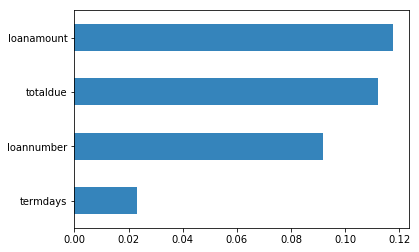

In [24]:
tst = train_demo_perf.corr()['good_bad_flag'].copy()
tst = tst.drop('good_bad_flag')
tst.sort_values(inplace=True)
tst.plot(kind='barh', alpha = 0.9)

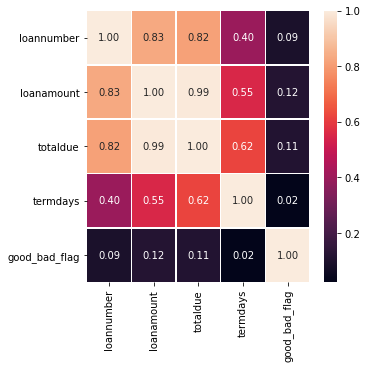

In [25]:
#correlation map
import seaborn as sns
f,ax = plt.subplots(figsize=(5, 5))
sns.heatmap(train_demo_perf.corr(), annot=True, linewidths=.5, fmt= '.2f',ax=ax)
plt.show()

In [26]:
# since totaldue and loanamount are highly correlative hence the need to remove one
train_demo_perf.drop(['loanamount'],axis =1, inplace = True)  

<function matplotlib.pyplot.show>

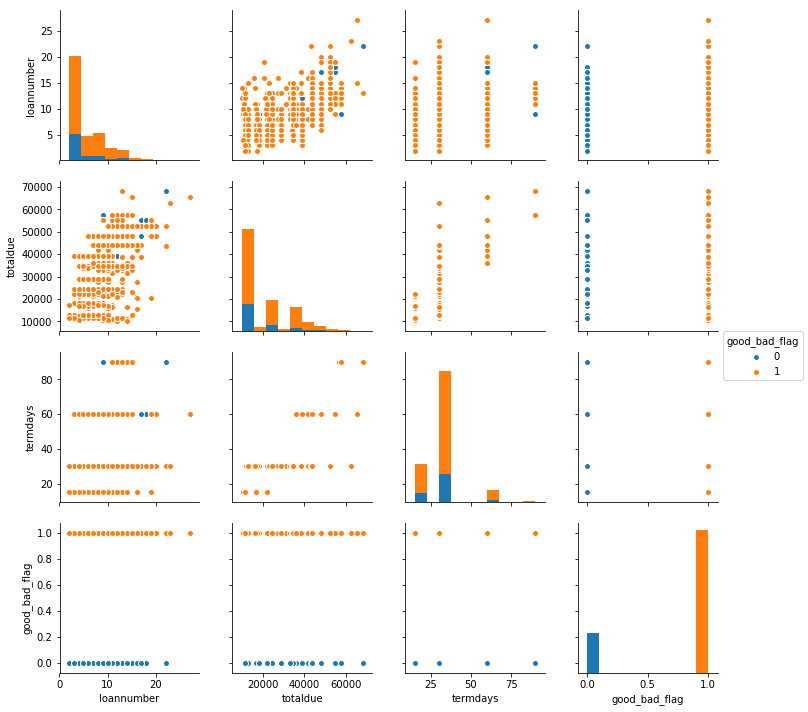

In [27]:
# Visuallizing using PairPlot
sns.pairplot(train_demo_perf, hue = 'good_bad_flag' )
plt.show

In [28]:
test_perf = pd.DataFrame(testperf.isnull().sum(), columns = ['test_perf'])
train_perf = pd.DataFrame(trainperf.isnull().sum(), columns = ['train_perf'])
test_demo = pd.DataFrame(testdemo.isnull().sum(), columns = ['test_demo'])
train_demo = pd.DataFrame(traindemo.isnull().sum(), columns = ['train_demo'])

test_prev = pd.DataFrame(testprevloans.isnull().sum(), columns = ['test_prev'])
train_prev= pd.DataFrame(trainprevloans.isnull().sum(), columns = ['train_prev'])
print(pd.concat([test_perf,train_perf], axis = 1), '\n')
print(pd.concat([test_demo,train_demo], axis = 1),'\n')
print(pd.concat([test_prev, train_prev], axis =1))

               test_perf  train_perf
approveddate         0.0           0
creationdate         0.0           0
customerid           0.0           0
good_bad_flag        NaN           0
loanamount           0.0           0
loannumber           0.0           0
referredby        1266.0        3781
systemloanid         0.0           0
termdays             0.0           0
totaldue             0.0           0 

                            test_demo  train_demo
customerid                          0           0
birthdate                           0           0
bank_account_type                   0           0
longitude_gps                       0           0
latitude_gps                        0           0
bank_name_clients                   0           0
bank_branch_clients              1473        4295
employment_status_clients         217         648
level_of_education_clients       1277        3759 

                 test_prev  train_prev
customerid               0           0
systemloani

# Model Building

In [29]:
# Preview contract
account_type = pd.get_dummies(train_demo_perf['bank_account_type'],prefix= 'account')
employment_status = pd.get_dummies(train_demo_perf['employment_status_clients'], prefix = 'employ_status')
Level_of_education_clients = pd.get_dummies(train_demo_perf['level_of_education_clients'], prefix = 'edu_status')
acc_emp_edu = pd.concat((account_type,employment_status,Level_of_education_clients),axis=1)
acc_emp_edu.head()

# Handling multicollinearity
acc_emp_edu = acc_emp_edu.drop(['account_Current', 'employ_status_Contract','edu_status_Graduate'], axis=1)
acc_emp_edu.head()

,account_Other,account_Savings,employ_status_Permanent,employ_status_Retired,employ_status_Self-Employed,employ_status_Student,employ_status_Unemployed,edu_status_Post-Graduate,edu_status_Primary,edu_status_Secondary
0,0,1,1,0,0,0,0,0,0,0
1,0,1,1,0,0,0,0,0,0,0
2,0,1,1,0,0,0,0,0,0,0
3,0,1,1,0,0,0,0,0,0,0
4,0,1,1,0,0,0,0,0,0,0


In [30]:
train_demo_perf_new = pd.concat([train_demo_perf, acc_emp_edu], axis = 1)

#since we have concatenated the categorized variable
#we drop the existing columns of bank_account_type, employment_status_clients, level_of_education_clients
train_demo_perf_new.drop(['bank_account_type', 'employment_status_clients','level_of_education_clients'],axis=1, inplace =True)

#Preview
train_demo_perf_new.head()


,loannumber,totaldue,termdays,good_bad_flag,account_Other,account_Savings,employ_status_Permanent,employ_status_Retired,employ_status_Self-Employed,employ_status_Student,employ_status_Unemployed,edu_status_Post-Graduate,edu_status_Primary,edu_status_Secondary
0,2,13000.0,30,1,0,1,1,0,0,0,0,0,0,0
1,2,13000.0,30,0,0,1,1,0,0,0,0,0,0,0
2,4,13000.0,30,1,0,1,1,0,0,0,0,0,0,0
3,2,11500.0,15,1,0,1,1,0,0,0,0,0,0,0
4,6,24500.0,30,1,0,1,1,0,0,0,0,0,0,0


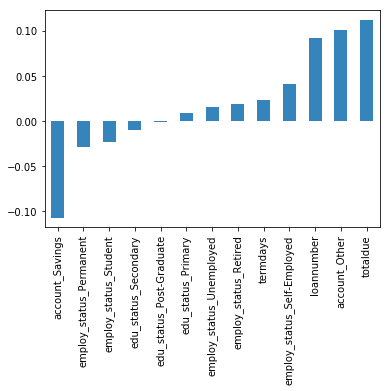

In [31]:
tst = train_demo_perf_new.corr()['good_bad_flag'].copy()
tst = tst.drop('good_bad_flag')
tst.sort_values(inplace=True)
tst.plot(kind='bar', alpha = 0.9)



In [32]:
train_demo_perf_new.columns


Index(['loannumber', 'totaldue', 'termdays', 'good_bad_flag', 'account_Other',
       'account_Savings', 'employ_status_Permanent', 'employ_status_Retired',
       'employ_status_Self-Employed', 'employ_status_Student',
       'employ_status_Unemployed', 'edu_status_Post-Graduate',
       'edu_status_Primary', 'edu_status_Secondary'],
      dtype='object')

In [33]:
train_demo_perf_new.drop(['account_Other',
       'account_Savings', 'employ_status_Permanent', 'employ_status_Retired',
       'employ_status_Self-Employed', 'employ_status_Student',
       'employ_status_Unemployed', 'edu_status_Post-Graduate',
       'edu_status_Primary', 'edu_status_Secondary'], axis=1, inplace = True)


In [43]:
#Re-aranging columns
new_columns = ['loannumber','totaldue','termdays','good_bad_flag']
train_demo_perf_new  = train_demo_perf_new.reindex(columns = [new_columns])
#preview
train_demo_perf_new.head()

,loannumber,totaldue,termdays,good_bad_flag
0,2,13000.0,30,1
1,2,13000.0,30,0
2,4,13000.0,30,1
3,2,11500.0,15,1
4,6,24500.0,30,1


In [69]:
test_x

,test_perf
customerid,0
loannumber,0
totaldue,0
termdays,0


In [70]:
# Defining Input and Target
X = train_demo_perf_new.iloc[:,:-1]
y = train_demo_perf_new["good_bad_flag"]

# Defining Test Set

test_x = test_perf.drop(['customerid','systemloanid','approveddate','creationdate','loanamount','referredby'])


# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

#Observing the dimension
X_train.shape, y_train.shape, X_test.shape, y_test.shape


((2621, 3), (2621,), (656, 3), (656,))

In [71]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### Logistic Regression

In [72]:
# Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred_svm = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, y_train) * 100, 2)
print('Acc_log: %.2f' %acc_log)

acc_met_logreg = round(accuracy_score(y_test, y_pred_svm)*100,2)
print('metrcis_accuracy : %.2f' %acc_met_logreg)

Acc_log: 78.37
metrcis_accuracy : 77.59


In [73]:
X = train_demo_perf_new.iloc[:,:-1]
y = train_demo_perf_new["good_bad_flag"]
coeff_df = pd.DataFrame(X.columns)
coeff_df.columns = ['Feature']
coeff_df["Correlation"] = pd.Series(logreg.coef_[0])

coeff_df.sort_values(by='Correlation', ascending=False)

,Feature,Correlation
1,totaldue,0.501946
0,loannumber,-0.060909
2,termdays,-0.235682


### Support Vector Machines

In [74]:
# Support Vector Machines
C=1
svc = SVC(C=C,gamma=5)
svc.fit(X_train, y_train)
y_pred_svm = svc.predict(X_test)
acc_svc = round(svc.score(X, y) * 100, 2)
print('SVC score:', acc_svc)

acc_met_svm = round(accuracy_score(y_test, y_pred_svm)*100,2)
print('metrcis_accuracy : %.2f' %(accuracy_score(y_test, y_pred_svm)*100))
     

SVC score: 78.21
metrcis_accuracy : 77.59


### Stochastic Gradient Descent

In [75]:
# Stochastic Gradient Descent
sgd = SGDClassifier()
sgd.fit(X_train, y_train)
y_pred_sgd = sgd.predict(X_test)
acc_sgd = round(sgd.score(X_train, y_train) * 100, 2)
print('SGD_score:%.2f', acc_sgd)

acc_met_sgd = round(accuracy_score(y_test, y_pred_sgd)*100,2)
print('metrics_accuracy : %.2f' %acc_met_sgd)

SGD_score:%.2f 54.03
metrics_accuracy : 54.57


C:\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:84: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


### KNeighborsClassifier

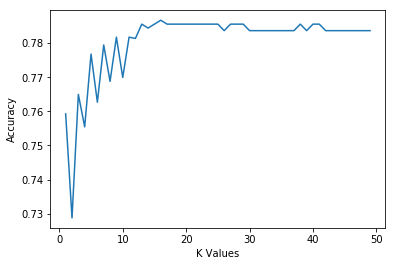

In [76]:
# Find Best K Value
score_list = []
for each in range(1,50):
    knn_2 = KNeighborsClassifier(n_neighbors = each)
    knn_2.fit(X_train, y_train)
    score_list.append(knn_2.score(X_train,y_train))

plt.plot(range(1,50), score_list)
plt.xlabel("K Values")
plt.ylabel("Accuracy")
plt.show()

In [77]:
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
acc_knn = round(knn.score(X_train, y_train) * 100, 2)
print ('KNN score:%.2f' %acc_knn)

acc_met_knn = round(accuracy_score(y_test, y_pred_knn)*100,2)

print('metrcis_accuracy : %.2f' %acc_met_knn)

KNN score:77.68
metrcis_accuracy : 76.68


### XGBoost

In [78]:
import xgboost
from xgboost import XGBClassifier

xgboost = XGBClassifier()
xgb = xgboost.fit( X_train, y_train)
y_pred_xgb = xgb.predict(X_test)
acc_xgb =round(xgb.score(X_train,y_train)*100, 2)
print ('XGB score:%.2f' %acc_xgb)

acc_met_xgb = round(accuracy_score(y_test, y_pred_xgb)*100,2)

print('metrcis_accuracy : %.2f' %acc_met_xgb)

XGB score:78.37
metrcis_accuracy : 77.59


### DecisionTreeClassifier

In [79]:
dt_clf = DecisionTreeClassifier(random_state=42)

param_grid = {'criterion' : ('gini', 'entropy'),
              'max_features': ['auto', 'sqrt', 'log2'],
              'min_samples_split': sp_randint(2, 100), 
              'min_samples_leaf': sp_randint(1, 100)}



rand_dt = RandomizedSearchCV(dt_clf, param_grid, cv=10, scoring="accuracy", n_iter=100, random_state=42)
dec = rand_dt.fit(X_train,y_train)
rand_dt.best_params_

{'criterion': 'gini',
 'max_features': 'log2',
 'min_samples_leaf': 14,
 'min_samples_split': 28}

In [80]:
# Decision Tree

decision_tree = DecisionTreeClassifier(
    random_state=42, criterion= 'gini', max_features = 'auto',
    min_samples_leaf = 83, min_samples_split =88)

decision_tree.fit(X_train, y_train)
y_pred_dtc = dec.predict(X_test)
acc_dtc = round(dec.score(X_train, y_train) * 100, 2)
print ('DTC Acc:%.2f' %acc_dtc)

acc_met_dtc = round(accuracy_score(y_test, y_pred_dtc)*100,2)
print('metrcis_accuracy : %.2f' %acc_met_dtc)

DTC Acc:78.56
metrcis_accuracy : 77.29


### Random Forest

In [81]:
# Fitting Random Forest Classification to the Training set
rfc = RandomForestClassifier(random_state = 42)

param_grid = {'criterion' : ('gini', 'entropy'),
              'max_features': ['auto', 'sqrt', 'log2'],
              'min_samples_split': sp_randint(2, 20), 
              'min_samples_leaf': sp_randint(1, 20)}


randser = RandomizedSearchCV(rfc, param_grid, cv=5, scoring="accuracy", n_iter=20)
dec = randser.fit(X_train,y_train)
randser.best_params_


{'criterion': 'gini',
 'max_features': 'log2',
 'min_samples_leaf': 9,
 'min_samples_split': 14}

In [82]:
rfc = RandomForestClassifier(random_state=42, criterion = 'entropy', 
                             max_features = 'auto', min_samples_leaf= 18, min_samples_split= 17 )
rfc.fit(X_train, y_train)
y_pred_rfc = rfc.predict(X_test)
acc_rfc = round(rfc.score(X_train, y_train)*100, 2)
print ('RFC Acc: %.2f' %acc_rfc)

acc_met_rfc = round(accuracy_score(y_test, y_pred_rfc)*100,2)
print('metrcis_accuracy : %.2f' %(accuracy_score(y_test, y_pred_rfc)*100))

RFC Acc: 78.37
metrcis_accuracy : 77.59


### LinearDiscriminantAnalysis

In [83]:
lda =LinearDiscriminantAnalysis(solver= 'svd')
lda.fit(X_train, y_train)
y_pred_lda = lda.predict(X_test)
acc_lda = round(lda.score(X_train, y_train)*100, 2)
print ('RFC Acc: %.2f' %acc_lda)

acc_met_lda = round(accuracy_score(y_test, y_pred_lda)*100,2)
print('metris_accuracy : %.2f' %acc_met_lda)

RFC Acc: 78.37
metris_accuracy : 77.59


In [84]:
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'SVM', 'SGD', 
              'KNN', 'XGB', 'Decision_Tree', 
              'Random_Forest', 'Linear_Discriminant'],
    
    'Score': [acc_met_logreg, acc_met_svm, acc_met_sgd, 
              acc_met_knn,acc_met_xgb, acc_met_dtc, 
              acc_met_rfc, acc_met_lda]
            })

models.sort_values(by='Score', ascending=False)


,Model,Score
0,Logistic Regression,77.59
1,SVM,77.59
4,XGB,77.59
6,Random_Forest,77.59
7,Linear_Discriminant,77.59
5,Decision_Tree,77.29
3,KNN,76.68
2,SGD,54.57


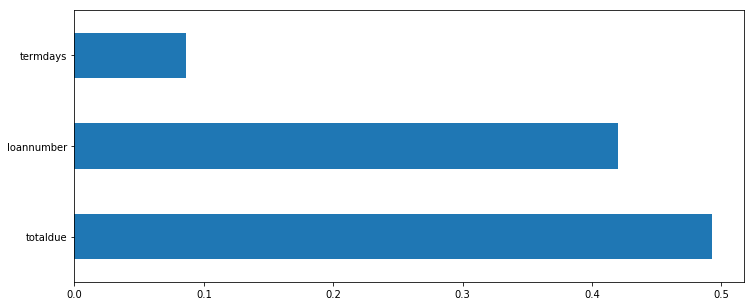

In [85]:
plt.figure(figsize=(12,5))
feat_importances = pd.Series(xgb.feature_importances_, index = X.columns)
feat_importances.nlargest(24).plot(kind='barh')

In [86]:
test_pred = xgboost.predict(test_x) #predict on the test set for submission

ValueError: feature_names mismatch: ['f0', 'f1', 'f2'] ['test_perf']
expected f1, f0, f2 in input data
training data did not have the following fields: test_perf

In [ ]:
df = {'customerid': test_perf['customerid'], 'Good_Bad_flag': test_pred}
sub = pd.DataFrame(data=df)
sub = sub[['customerid', 'Good_Bad_flag']]

In [ ]:
eclf = VotingClassifier(estimators=[('lr', clf1), ('rf', clf2), ('gnb', clf3)], voting='soft')
params = {'lr__C': [1.0, 100.0], 'rf__n_estimators': [20, 200],}
grid = GridSearchCV(estimator=eclf, param_grid=params, cv=5)
grid = grid.fit(X_train, y_train)

In [ ]:
# calculate ROC Curve
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve (y_test, y_pred_dtc)
roc_auc= auc (fpr, tpr)
print  ("ROC AUC", roc_auc)
conftable(y_test,y_pred,"conf")

In [ ]:


eclf = VotingClassifier(estimators=[('lr', clf1), ('rf', clf2), ('gnb', clf3)], voting='soft')
params = {'lr__C': [1.0, 100.0], 'rf__n_estimators': [20, 200],}
grid = GridSearchCV(estimator = eclf, param_grid=params, cv=5)
grid = grid.fit(X_train, y_train)

NameError: name 'test_perf' is not defined